# 5.2.3 Load and Read the CSV files

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Paths to files
path_city_data = os.path.join('.','resources','city_data.csv')
path_ride_data = os.path.join('.','resources','ride_data.csv')

In [4]:
# Read the city data file and store it in a pandas DataFrame
df_city_data = pd.read_csv(path_city_data)

df_city_data.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
df_ride_data = pd.read_csv(path_ride_data)

df_ride_data.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the City Data DataFrame

In [6]:
# Get the columns and the rows that are not null
df_city_data.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null
df_city_data.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
df_city_data.dtypes  # Why no parentheses? Is `dtypes` not a method on a DataFrame object?

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
df_city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities
df_city_data['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Inspect Ride Data DataFrame

In [11]:
# Get the columns and the rows that are not null
df_ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null
df_ride_data.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column
df_ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [14]:
# Combine the data into a single dataset
df_PyBer_data = pd.merge(df_ride_data, df_city_data, how='left', on=['city', 'city'])

# Display the DataFrame
df_PyBer_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# 5.3.1 Create DataFrames for Each Type of City

In [15]:
# Create the Urban city DataFrame
df_cities_urban = df_PyBer_data[df_PyBer_data['type'] == 'Urban']

df_cities_urban.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban city DataFrame
df_cities_suburban = df_PyBer_data[df_PyBer_data['type'] == 'Suburban']

df_cities_suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# Create the Rural city DataFrame
df_cities_rural = df_PyBer_data[df_PyBer_data['type'] == 'Rural']

df_cities_rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# 5.3.2 Get the Number of Rides for Each City Type

In [18]:
# Get the number of rides for urban cities
rides_urban = df_cities_urban.groupby('city')['ride_id'].count()

rides_urban.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for suburban cities
rides_suburban = df_cities_suburban.groupby('city')['ride_id'].count()

rides_suburban.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get the number of rides for rural cities
rides_rural = df_cities_rural.groupby('city')['ride_id'].count()

rides_rural.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

# 5.3.3 Get the Average Fare for Each City Type

In [21]:
# Get average fare for each city in the urban cities
fares_urban_mean = df_cities_urban.groupby('city')['fare'].mean()

fares_urban_mean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the suburban cities
fares_suburban_mean = df_cities_suburban.groupby('city')['fare'].mean()

fares_suburban_mean.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
# Get average fare for each city in the rural cities
fares_rural_mean = df_cities_rural.groupby('city')['fare'].mean()

fares_rural_mean.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

# 5.3.4 Get the Average Number of Drivers for Each City Type

In [24]:
# Get the average number of drivers for each rural city
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_city_data.sort_values(['type', 'city']))

,city,driver_count,type
115,Bradshawfurt,7,Rural
114,Garzaport,7,Rural
109,Harringtonfort,4,Rural
118,Jessicaport,1,Rural
110,Lake Jamie,4,Rural
111,Lake Latoyabury,2,Rural
106,Michaelberg,6,Rural
116,New Ryantown,2,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural


In [25]:
# Get the average number of drivers for each urban city
drivers_urban = df_cities_urban.groupby('city')['driver_count'].mean()

drivers_urban.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each rural city
drivers_rural = df_cities_rural.groupby('city')['driver_count'].mean()

drivers_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each suburban city
drivers_suburban = df_cities_suburban.groupby('city')['driver_count'].mean()

drivers_suburban.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each rural city
drivers_rural = df_cities_rural.groupby('city')['driver_count'].mean()

drivers_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# 5.3.5 Create Bubble Charts

## Create the Urban Cities Bubble Chart

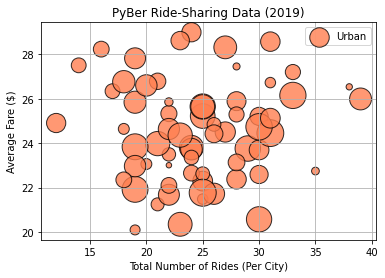

In [29]:
# Build the scatter plots for urban cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_urban,        # x-values
    fares_urban_mean,    # y-values
    label='Urban',
    s=10*drivers_urban, # More drivers = bigger dots
    color='coral',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid
ax.legend()             # Add legend

# Create the Suburban Cities Bubble Chart

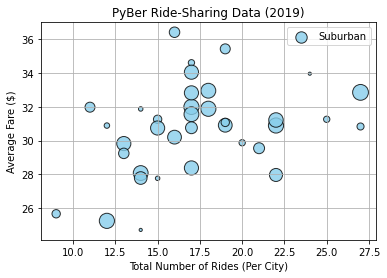

In [30]:
# Build the scatter plots for suburban cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_suburban,         # x-values
    fares_suburban_mean,    # y-values
    label='Suburban',
    s=10*drivers_suburban,  # More drivers = bigger dots
    color='skyblue',
    linewidths=1,
    edgecolors='k',         # black
    alpha=.8
)
ax.grid()                   # Add grid
ax.legend()                 # Add legend

# Create the Rural Cities Bubble Chart

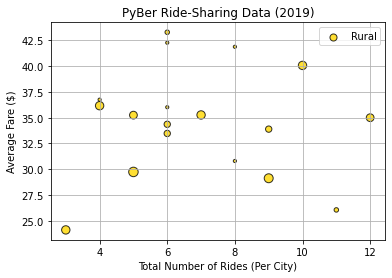

In [31]:
# Build the scatter plots for rural cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_rural,        # x-values
    fares_rural_mean,   # y-values
    label='Rural',
    s=10*drivers_rural, # More drivers = bigger dots
    color='gold',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid
ax.legend()             # Add legend

# 5.3.6 Create a Bubble Chart for All Cities

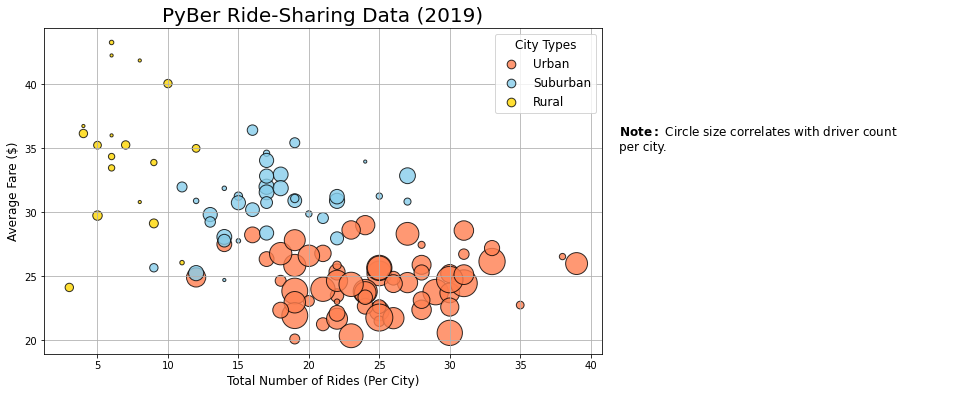

In [32]:
# Add the scatter charts for each type of city
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=20)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_ylabel('Average Fare ($)', fontsize=12)

# Urban
ax.scatter(
    rides_urban,        # x-values
    fares_urban_mean,    # y-values
    label='Urban',
    s=10*drivers_urban, # More drivers = bigger dots
    color='coral',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)

# Suburban
ax.scatter(
    rides_suburban,         # x-values
    fares_suburban_mean,     # y-values
    label='Suburban',
    s=10*drivers_suburban,  # More drivers = bigger dots
    color='skyblue',
    linewidths=1,
    edgecolors='k',         # black
    alpha=.8
)

# Rural
ax.scatter(
    rides_rural,        # x-values
    fares_rural_mean,   # y-values
    label='Rural',
    s=10*drivers_rural, # More drivers = bigger dots
    color='gold',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid

lgnd = ax.legend(       # Add legend, and assign it to `lgnd`
#     mode='expand',
    loc='best',
    title='City Types',
    title_fontsize=12,
    fontsize=12,        # For the legend entries, not the legend title
    scatterpoints=1     # Number of markers for each series in the legend
)

# Set all three legend markers in `lgnd` to 75-point font size
for i in range(3):
    lgnd.legendHandles[i]._sizes = [75]

# Incorporate a text label about circle size.
plt.text(
    42, 35,  # What are the units for the coordinates?
    # Code for bold text from https://stackoverflow.com/a/44123579
    r'$\bf{Note:}$ Circle size correlates with driver count per city.',  # The `r` at the front is to ignore the `\`
    wrap=True,
    fontsize=12
)

# Save the figure.
plt.savefig(
    os.path.join('.','analysis','fig1.png')
    , bbox_inches='tight'   # Prevents the saved image from cropping the text label
#     , pad_inches=0.25       # Adds a quarter-inch pad space around the edge of the figure
)

# 5.4.1 Summary Statistics for Number of Rides by City Type

## Pandas `describe()` Function

In [33]:
# Get summary statistics
display(df_cities_urban.describe())
display(df_cities_suburban.describe())
display(df_cities_rural.describe())

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
# Get summary statistics
display(rides_urban.describe())
display(rides_suburban.describe())
display(rides_rural.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas mean(), median(), and mode() Methods

In [35]:
# Calculate the mean of the ride count for each city type
round(rides_urban.mean(),2), round(rides_suburban.mean(),2), round(rides_rural.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculate the median of the ride count for each city type
round(rides_urban.median(),2), round(rides_suburban.median(),2), round(rides_rural.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# Calculate the mode of the ride count for each city type
round(rides_urban.mode(),2), round(rides_suburban.mode(),2), round(rides_rural.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

## NumPy `mean()` and `median()` Functions and SciPy `mode()` Function

In [38]:
# Import dependencies
import numpy as np
import scipy.stats as stats

In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities
rides_urban_mean = np.mean(rides_urban)
print(f"The mean for the ride counts for urban trips is {rides_urban_mean:.2f}.")

rides_urban_median = np.median(rides_urban)
print(f"The median for the ride counts for urban trips is {rides_urban_median}.")

rides_urban_mode = stats.mode(rides_urban)
print(f"The mode for the ride counts for urban trips is {rides_urban_mode}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
# Calculate the measures of central tendency for the ride count for the suburban cities
rides_suburban_mean = np.mean(rides_suburban)
print(f"The mean for the ride counts for suburban trips is {rides_suburban_mean:.2f}.")

rides_suburban_median = np.median(rides_suburban)
print(f"The median for the ride counts for suburban trips is {rides_suburban_median}.")

rides_suburban_mode = stats.mode(rides_suburban)
print(f"The mode for the ride counts for suburban trips is {rides_suburban_mode}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the rural cities
rides_rural_mean = np.mean(rides_rural)
print(f"The mean for the ride counts for rural trips is {rides_rural_mean:.2f}.")

rides_rural_median = np.median(rides_rural)
print(f"The median for the ride counts for rural trips is {rides_rural_median}.")

rides_rural_mode = stats.mode(rides_rural)
print(f"The mode for the ride counts for rural trips is {rides_rural_mode}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# 5.4.2 Summary Statistics for the Fare by City Type

In [42]:
# Calculate the measures of central tendency for the average fare for the urban cities.
fares_urban_mean = np.mean(df_cities_urban['fare'])
print(f"The mean fare price for urban trips is ${fares_urban_mean:.2f}.")

fares_urban_median = np.median(df_cities_urban['fare'])
print(f"The median fare price for urban trips is ${fares_urban_median:.2f}.")

fares_urban_mode = stats.mode(df_cities_urban['fare'])
print(f"The mode fare price for urban trips is {fares_urban_mode}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [43]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
fares_suburban_mean = np.mean(df_cities_suburban['fare'])
print(f"The mean fare price for suburban trips is ${fares_suburban_mean:.2f}.")

fares_suburban_median = np.median(df_cities_suburban['fare'])
print(f"The median fare price for suburban trips is ${fares_suburban_median:.2f}.")

fares_suburban_mode = stats.mode(df_cities_suburban['fare'])
print(f"The mode fare price for suburban trips is {fares_suburban_mode}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [44]:
# Calculate the measures of central tendency for the average fare for the rural cities.
fares_rural_mean = np.mean(df_cities_rural['fare'])
print(f"The mean fare price for rural trips is ${fares_rural_mean:.2f}.")

fares_rural_median = np.median(df_cities_rural['fare'])
print(f"The median fare price for rural trips is ${fares_rural_median:.2f}.")

fares_rural_mode = stats.mode(df_cities_rural['fare'])
print(f"The mode fare price for rural trips is {fares_rural_mode}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# 5.4.3 Summary Statistics for the Number of Drivers by City Type

In [45]:
# Calculate the measures of central tendency for the driver count for the urban cities.
drivers_urban_mean = np.mean(df_cities_urban['driver_count'])
print(f"The mean number of drivers for urban trips is {drivers_urban_mean:.2f}.")

drivers_urban_median = np.median(df_cities_urban['driver_count'])
print(f"The median number of drivers for urban trips is {drivers_urban_median:.2f}.")

drivers_urban_mode = stats.mode(df_cities_urban['driver_count'])
print(f"The mode number of drivers for urban trips is {drivers_urban_mode}.")

The mean number of drivers for urban trips is 36.68.
The median number of drivers for urban trips is 37.00.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [46]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
drivers_suburban_mean = np.mean(df_cities_suburban['driver_count'])
print(f"The mean number of drivers for suburban trips is {drivers_suburban_mean:.2f}.")

drivers_suburban_median = np.median(df_cities_suburban['driver_count'])
print(f"The median number of drivers for suburban trips is {drivers_suburban_median:.2f}.")

drivers_suburban_mode = stats.mode(df_cities_suburban['driver_count'])
print(f"The mode number of drivers for suburban trips is {drivers_suburban_mode}.")

The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [47]:
# Calculate the measures of central tendency for the driver count for the rural cities.
drivers_rural_mean = np.mean(df_cities_rural['driver_count'])
print(f"The mean number of drivers for rural trips is {drivers_rural_mean:.2f}.")

drivers_rural_median = np.median(df_cities_rural['driver_count'])
print(f"The median number of drivers for rural trips is {drivers_rural_median:.2f}.")

drivers_rural_mode = stats.mode(df_cities_rural['driver_count'])
print(f"The mode number of drivers for rural trips is {drivers_rural_mode}.")

The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# 5.4.4 Create Box-and-Whisker Plots

## Box-and-Whisker Plots for Ride Count Data

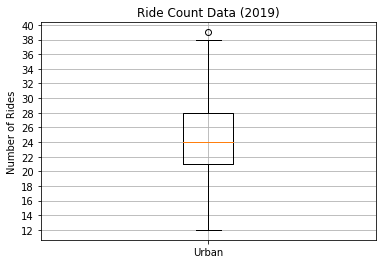

In [48]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban']

fig, ax = plt.subplots()

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2))

ax.boxplot(
    rides_urban,
    labels=x_labels
)

ax.grid()

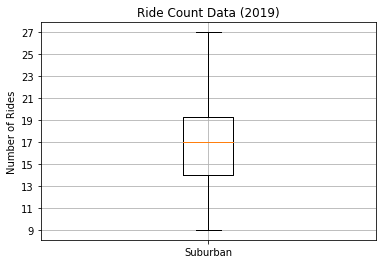

In [49]:
# Create a box-and-whisker plot for the suburban cities ride count
x_labels = ['Suburban']

fig, ax = plt.subplots()

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(7, 31, step=2))

ax.boxplot(
    rides_suburban,
    labels=x_labels
)

ax.grid()

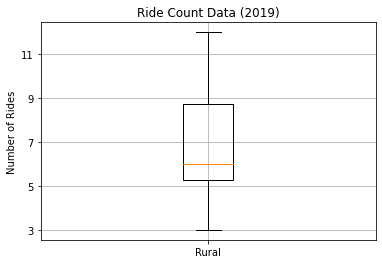

In [50]:
# Create a box-and-whisker plot for the rural cities ride count
x_labels = ['Rural']

fig, ax = plt.subplots()

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 16, step=2))

ax.boxplot(
    rides_rural,
    labels=x_labels
)

ax.grid()

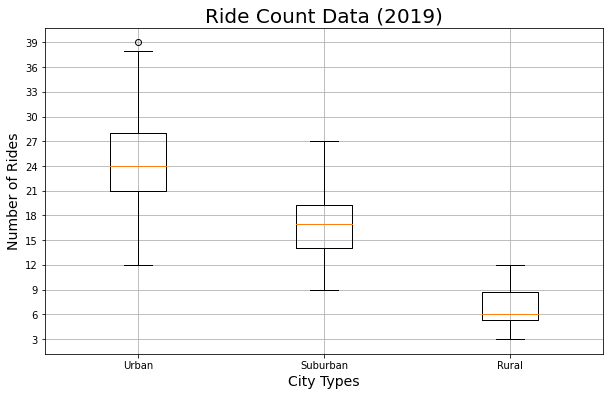

In [51]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
rides_all = [rides_urban, rides_suburban, rides_rural]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3))

ax.boxplot(
    rides_all,
    labels=x_labels
)

ax.grid()

# Save the figure.
plt.savefig(
    os.path.join('.','analysis','fig2.png')
#     , bbox_inches='tight'   # Prevents the saved image from cropping the text label
#     , pad_inches=0.25       # Adds a quarter-inch pad space around the edge of the figure
)

In [52]:
# Get the city that matches 39.

# rides_urban_outlier = rides_urban[rides_urban==39].index[0]
# print(f'{rides_urban_outlier} has the highest rider count.')

print(f'{rides_urban[rides_urban == 39].index[0]} has the highest rider count.')

West Angela has the highest rider count.


## Box-and-Whisker Plots for Ride Fare Data

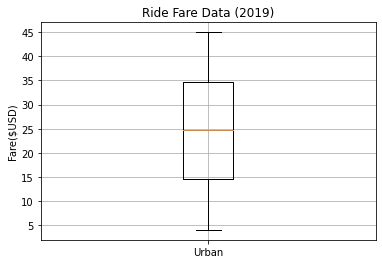

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [53]:
# Create a box-and-whisker plot for the urban fare data
x_labels = ['Urban']

fig, ax = plt.subplots()

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5))

ax.boxplot(
    df_cities_urban['fare'],    # Module calls this series `urban_fares`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_urban['fare'].describe()

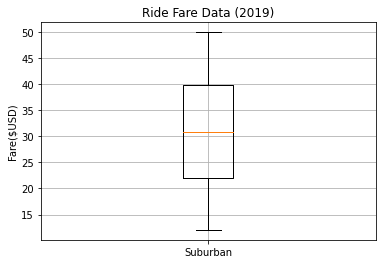

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [54]:
# Create a box-and-whisker plot for the suburban fare data
x_labels = ['Suburban']

fig, ax = plt.subplots()

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5))

ax.boxplot(
    df_cities_suburban['fare'],    # Module calls this series `suburban_fares`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_suburban['fare'].describe()

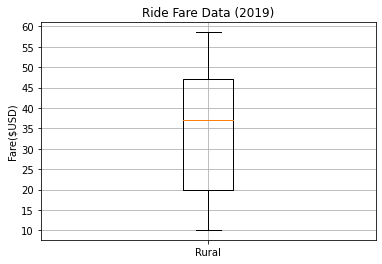

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [56]:
# Create a box-and-whisker plot for the rural fare data
x_labels = ['Rural']

fig, ax = plt.subplots()

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5))

ax.boxplot(
    df_cities_rural['fare'],    # Module calls this series `rural_fares`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_rural['fare'].describe()

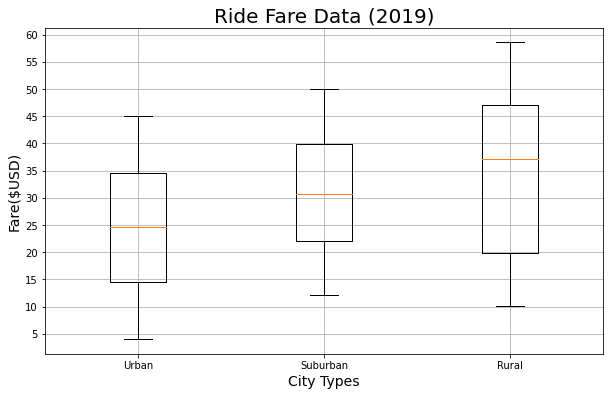

In [57]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
fares_all = [df_cities_urban['fare'], df_cities_suburban['fare'], df_cities_rural['fare']]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5))

ax.boxplot(
    fares_all,
    labels=x_labels
)

ax.grid()

# Save the figure.
plt.savefig(
    os.path.join('.','analysis','fig3.png')
#     , bbox_inches='tight'   # Prevents the saved image from cropping the text label
#     , pad_inches=0.25       # Adds a quarter-inch pad space around the edge of the figure
)

## Box-and-Whisker Plots for Driver Count Data

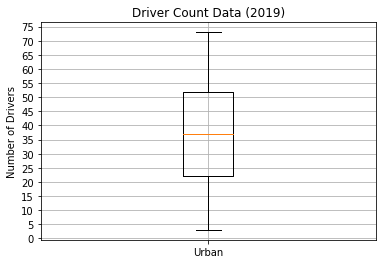

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [58]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ['Urban']

fig, ax = plt.subplots()

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5))

ax.boxplot(
    df_cities_urban['driver_count'],    # Module calls this series `urban_drivers`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_urban['driver_count'].describe()

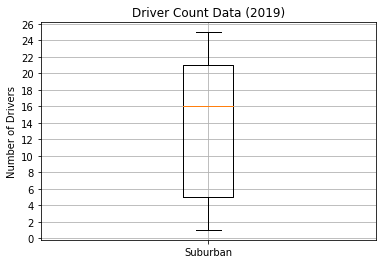

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [65]:
# Create the box-and-whisker plot for the suburban driver count data
x_labels = ['Suburban']

fig, ax = plt.subplots()

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 31, step=2))

ax.boxplot(
    df_cities_suburban['driver_count'], # Module calls this series `suburban_drivers`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_suburban['driver_count'].describe()

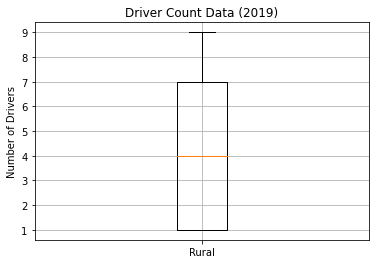

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [63]:
# Create the box-and-whisker plot for the rural driver count data
x_labels = ['Rural']

fig, ax = plt.subplots()

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 11, step=1))

ax.boxplot(
    df_cities_rural['driver_count'],    # Module calls this series `rural_drivers`
    labels=x_labels
)

ax.grid()

plt.show()

print("Summary Statistics")
df_cities_rural['driver_count'].describe()

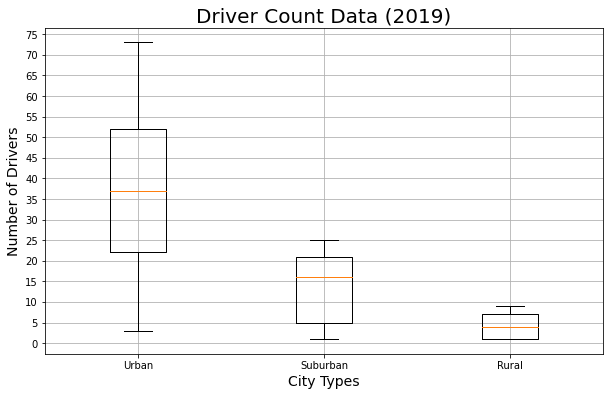

In [66]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
drivers_all = [df_cities_urban['driver_count'], df_cities_suburban['driver_count'], df_cities_rural['driver_count']]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_yticks(np.arange(0, 91, step=5))

ax.boxplot(
    drivers_all,
    labels=x_labels
)

ax.grid()

# Save the figure.
plt.savefig(
    os.path.join('.','analysis','fig4.png')
#     , bbox_inches='tight'   # Prevents the saved image from cropping the text label
#     , pad_inches=0.25       # Adds a quarter-inch pad space around the edge of the figure
)